## **Import required libraries**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Load and Prepare Dataset**

In [26]:
df = pd.read_csv('customer_clean_transactions.csv')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')

df = df[['CustomerID', 'InvoiceDate', 'Invoice', 'Quantity', 'Price']]
df.dropna(subset=['CustomerID'], inplace=True)

df['Revenue'] = df['Quantity'] * df['Price']


## **Analyze One-Time vs Repeat Customers**

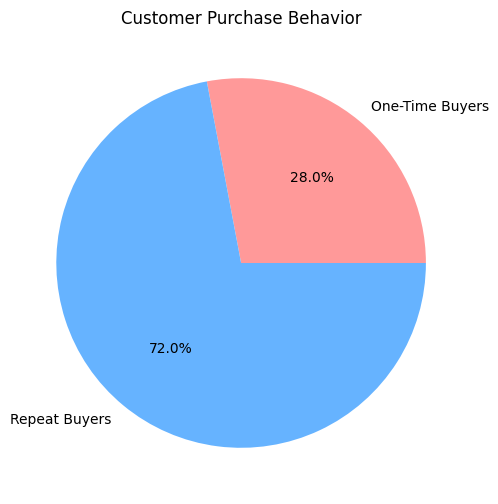

In [27]:
order_counts = df.groupby('CustomerID')['Invoice'].nunique()

one_time = order_counts[order_counts == 1].count()
repeat = order_counts[order_counts > 1].count()

plt.figure(figsize=(6, 6))
plt.pie([one_time, repeat], labels=['One-Time Buyers', 'Repeat Buyers'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Customer Purchase Behavior")
plt.show()


## **Time Between First and Last Purchase**

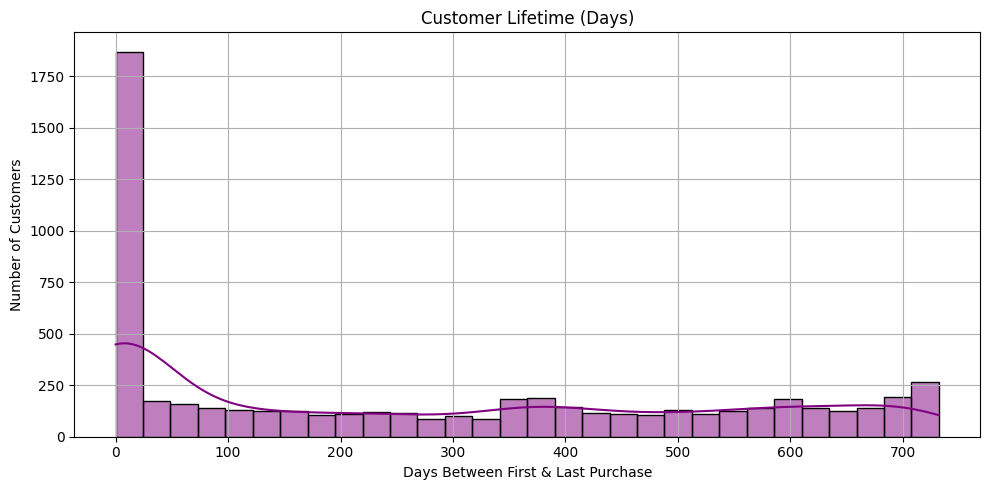

In [28]:
customer_lifetime = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
customer_lifetime['Lifetime'] = (customer_lifetime['max'] - customer_lifetime['min']).dt.days

plt.figure(figsize=(10, 5))
sns.histplot(customer_lifetime['Lifetime'], bins=30, kde=True, color='purple')
plt.title("Customer Lifetime (Days)")
plt.xlabel("Days Between First & Last Purchase")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()


## **Customer Retention by Month**

In [29]:
df['OrderMonth'] = df['InvoiceDate'].dt.to_period('M')
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

df['CohortIndex'] = (df['OrderMonth'] - df['CohortMonth']).apply(lambda x: x.n)

cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)


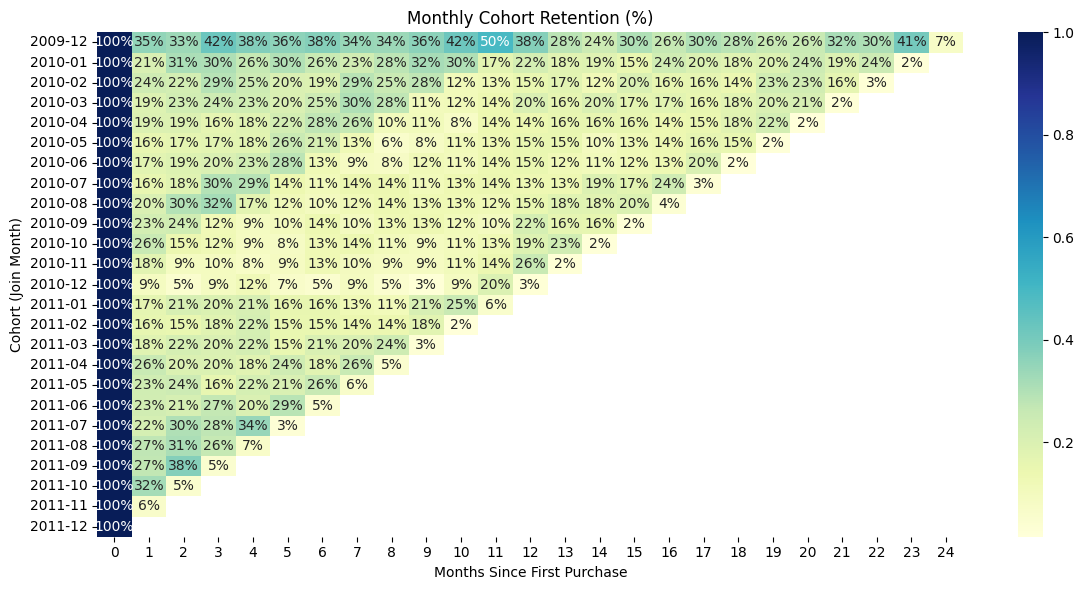

In [30]:
plt.figure(figsize=(12, 6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Monthly Cohort Retention (%)')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort (Join Month)')
plt.tight_layout()
plt.show()
